House price prediction dataset  using the boston housing dataset

In [1]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download the dataset from UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Define column names (as they are not present in raw dataset)
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(url, delim_whitespace=True, names=columns)

# Display first 5 rows
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
# Check for missing values
print(data.isnull().sum())

# Get dataset information
print(data.info())

# Summary statistics
print(data.describe())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN      

c:\Users\praji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


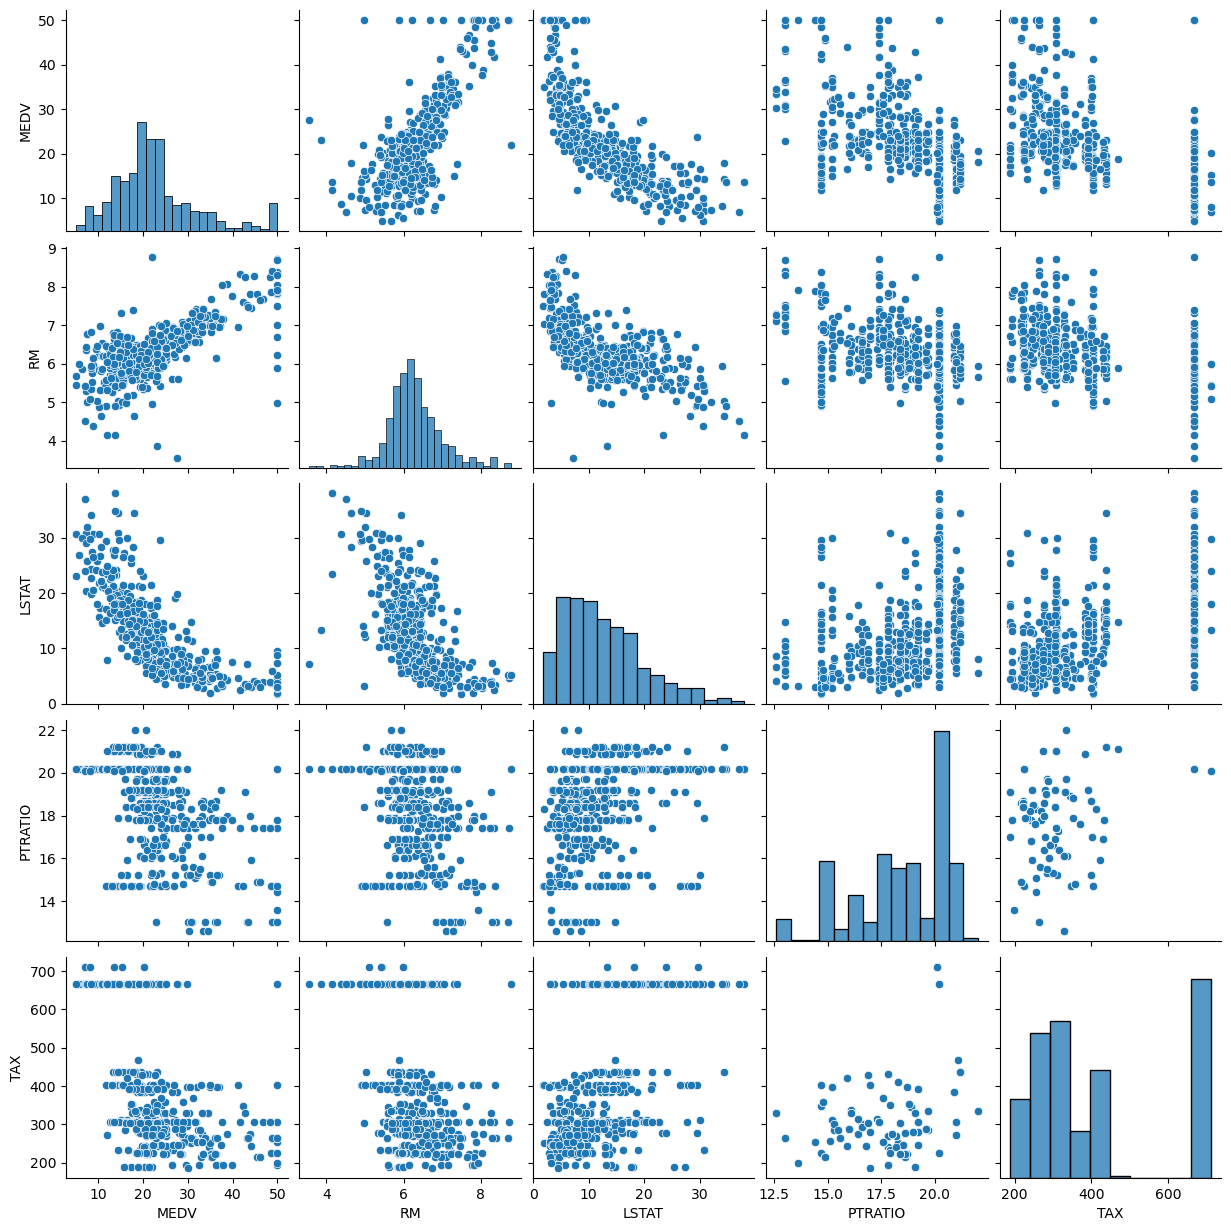

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key features to visualize against house prices (MEDV)
sns.pairplot(data[['MEDV', 'RM', 'LSTAT', 'PTRATIO', 'TAX']])
plt.show()


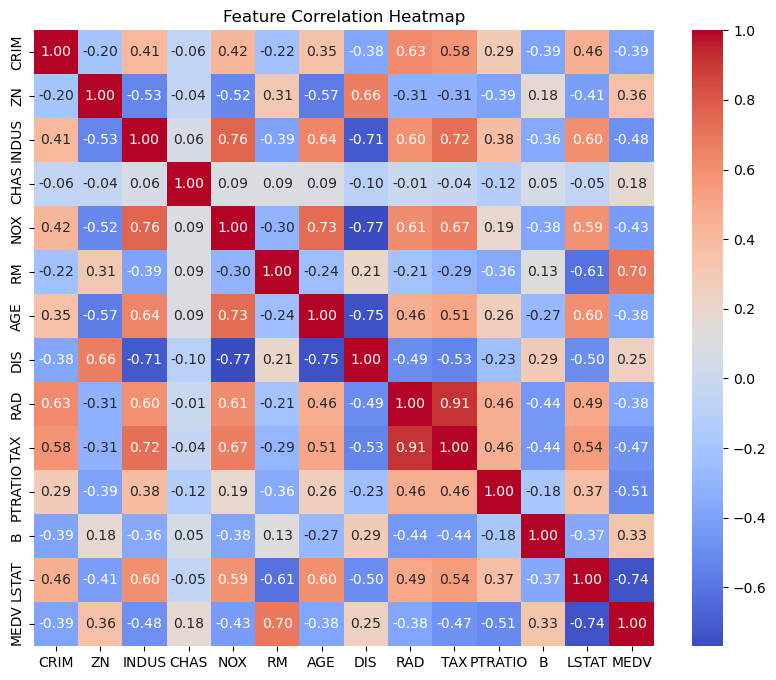

In [4]:
# Heatmap to visualize correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
# Drop less useful features
data = data.drop(columns=["CHAS", "INDUS"])


In [6]:
# Define X (features) and y (target variable)
X = data.drop(columns=['MEDV'])  # Features (all except house prices)
y = data['MEDV']  # Target variable (house prices)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of training and testing data
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (404, 11), Testing set: (102, 11)


In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform testing data


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Train & evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    preds = model.predict(X_test_scaled)  # Make predictions

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {"RMSE": rmse, "MAE": mae, "R² Score": r2}

    print(f"{name} Performance:")
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R² Score: {r2:.2f}\n")

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T
results_df


Linear Regression Performance:
RMSE: 4.95, MAE: 3.20, R² Score: 0.67

Decision Tree Performance:
RMSE: 2.90, MAE: 2.30, R² Score: 0.89

Random Forest Performance:
RMSE: 2.85, MAE: 2.02, R² Score: 0.89

Gradient Boosting Performance:
RMSE: 2.29, MAE: 1.74, R² Score: 0.93



,RMSE,MAE,R² Score
Linear Regression,4.948018,3.199010,0.666145
Decision Tree,2.900938,2.296828,0.885245
Random Forest,2.847413,2.022670,0.889440
Gradient Boosting,2.285107,1.735335,0.928795


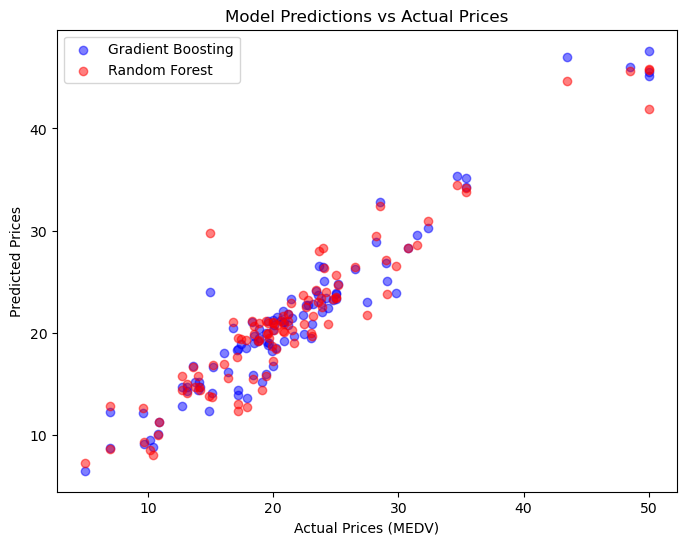

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot for best-performing model (Gradient Boosting)
plt.scatter(y_test, models["Gradient Boosting"].predict(X_test_scaled), alpha=0.5, label="Gradient Boosting", color="blue")

# Scatter plot for Random Forest
plt.scatter(y_test, models["Random Forest"].predict(X_test_scaled), alpha=0.5, label="Random Forest", color="red")

plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Model Predictions vs Actual Prices")
plt.show()


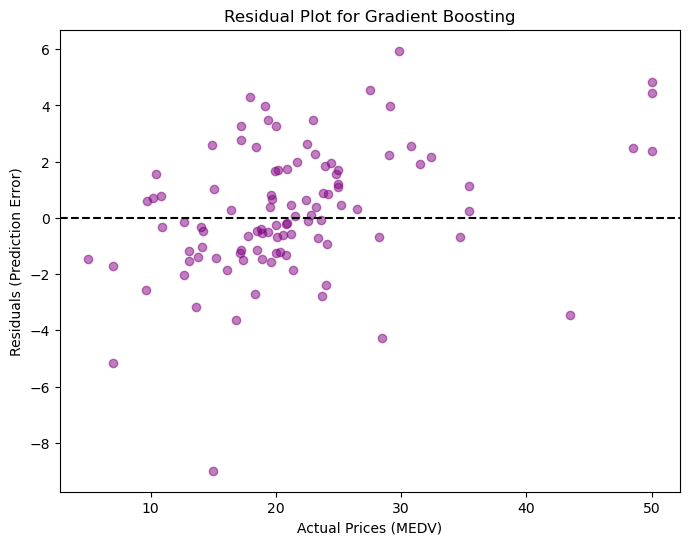

In [11]:
import numpy as np

# Calculate residuals (prediction errors)
residuals = y_test - models["Gradient Boosting"].predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Residuals (Prediction Error)")
plt.title("Residual Plot for Gradient Boosting")
plt.show()


In [12]:
import joblib

# Save the best model (Gradient Boosting)
joblib.dump(models["Gradient Boosting"], "house_price_model.pkl")

print("Model saved successfully as house_price_model.pkl")


Model saved successfully as house_price_model.pkl


In [13]:
# Load the saved model
loaded_model = joblib.load("house_price_model.pkl")

# Test the loaded model with new data (first 5 rows from test set)
new_predictions = loaded_model.predict(X_test_scaled[:5])
print("Predicted House Prices:", new_predictions)



Predicted House Prices: [23.67617684 30.2292779  16.77977598 22.69824782 17.96256355]
